In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [267]:
df = pd.read_csv("hpc_breakdowns.csv")
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [268]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [269]:
df.drop('Unnamed: 0',1,inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), object(2)
memory usage: 140.7+ MB


In [271]:
100*round(df.isnull().sum()/len(df),5)

Date                     0.000
Time                     0.000
Global_active_power      0.100
Global_reactive_power    0.023
Voltage                  0.099
Global_intensity         0.098
Sub_metering_1           0.063
Sub_metering_2           0.059
Sub_metering_3           0.006
dtype: float64

In [272]:
df.shape

(2049280, 9)

In [273]:
df['DateTime'] = df.Date+' '+df.Time
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16/12/2006 17:28:00


In [274]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format= "%d/%m/%Y %H:%M:%S")

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
DateTime                 datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 156.3+ MB


In [276]:
df.drop(['Date', 'Time'],1,inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
DateTime                 datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 125.1 MB


In [278]:
df.DateTime.max()

Timestamp('2010-11-26 21:02:00')

In [279]:
df.DateTime.min()

Timestamp('2006-12-16 17:24:00')

In [280]:
df = df.set_index('DateTime')

In [281]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [282]:
df = df.reset_index()

In [283]:
df.tail(200000)

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,2010-07-02 07:58:00,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1849281,2010-07-02 07:59:00,0.380,0.218,239.24,1.8,0.0,0.0,0.0
1849282,2010-07-02 08:00:00,0.378,0.216,238.64,1.8,0.0,0.0,1.0
1849283,2010-07-02 08:01:00,0.378,0.218,239.13,1.8,0.0,0.0,1.0
1849284,2010-07-02 08:02:00,0.376,0.214,238.32,1.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [284]:
df_valid = df[df.index >= 1849280]
df_valid.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,2010-07-02 07:58:00,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1849281,2010-07-02 07:59:00,0.380,0.218,239.24,1.8,0.0,0.0,0.0
1849282,2010-07-02 08:00:00,0.378,0.216,238.64,1.8,0.0,0.0,1.0
1849283,2010-07-02 08:01:00,0.378,0.218,239.13,1.8,0.0,0.0,1.0
1849284,2010-07-02 08:02:00,0.376,0.214,238.32,1.8,0.0,0.0,0.0


In [285]:
df_train = df[df.index < 1849280]
df_train.tail()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849275,2010-07-02 07:53:00,0.450,0.322,236.90,2.4,0.0,2.0,1.0
1849276,2010-07-02 07:54:00,0.386,0.216,236.69,1.8,0.0,0.0,0.0
1849277,2010-07-02 07:55:00,0.378,0.204,236.54,1.8,0.0,0.0,1.0
1849278,2010-07-02 07:56:00,0.376,0.204,236.15,1.8,0.0,0.0,1.0
1849279,2010-07-02 07:57:00,0.374,0.202,235.70,1.8,0.0,0.0,0.0


In [286]:
df_train.shape

(1849280, 8)

In [287]:
df_valid.shape

(200000, 8)

In [288]:
df.shape

(2049280, 8)

In [289]:
1849280/2049280*100

90.24047470331044

In [290]:
200000/2049280*100

9.759525296689569

In [291]:
df_train = df_train.set_index('DateTime')
df_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [292]:
df_valid = df_valid.set_index('DateTime')
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-07-02 07:58:00,0.376,0.208,237.01,1.8,0.0,0.0,1.0
2010-07-02 07:59:00,0.380,0.218,239.24,1.8,0.0,0.0,0.0
2010-07-02 08:00:00,0.378,0.216,238.64,1.8,0.0,0.0,1.0
2010-07-02 08:01:00,0.378,0.218,239.13,1.8,0.0,0.0,1.0
2010-07-02 08:02:00,0.376,0.214,238.32,1.8,0.0,0.0,0.0


In [293]:
df_train.isnull().sum()

Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
dtype: int64

In [294]:
df_train.isnull().sum()/len(df_train) *100

Global_active_power      0.107988
Global_reactive_power    0.023739
Voltage                  0.108366
Global_intensity         0.097930
Sub_metering_1           0.064998
Sub_metering_2           0.060997
Sub_metering_3           0.006976
dtype: float64

In [295]:
df_valid.isnull().sum()

Global_active_power       46
Global_reactive_power     38
Voltage                   27
Global_intensity         190
Sub_metering_1            95
Sub_metering_2            82
Sub_metering_3             0
dtype: int64

In [296]:
df_valid.isnull().sum()/len(df_valid)*100

Global_active_power      0.0230
Global_reactive_power    0.0190
Voltage                  0.0135
Global_intensity         0.0950
Sub_metering_1           0.0475
Sub_metering_2           0.0410
Sub_metering_3           0.0000
dtype: float64

In [297]:
df_train.dropna(inplace=True)

In [298]:
df_valid.dropna(inplace=True)

In [299]:
df_train.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [300]:
df_valid.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Data Analysis

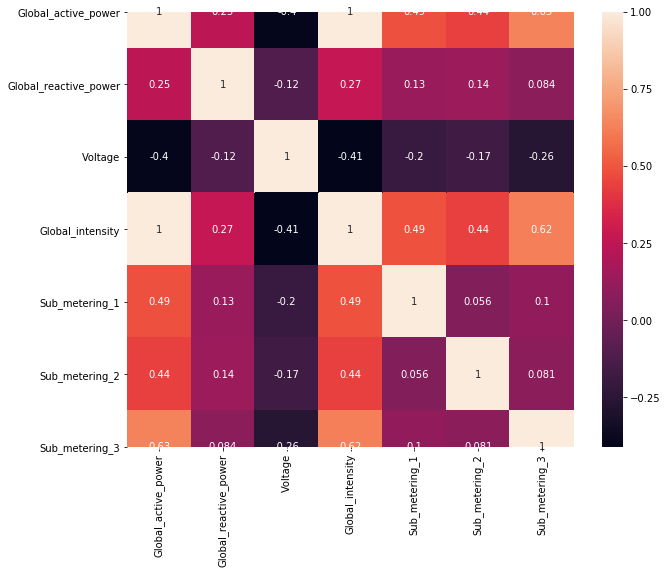

In [186]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot = True)

In [187]:
sns.pairplot(df_train)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024AC742CCA8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024AC74380D8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.distplot(df_train.Global_intensity)

In [301]:
df_train.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06
mean,1.109721e+00,1.226022e-01,2.407981e+02,4.702740e+00,1.157097e+00,1.333931e+00,6.528684e+00
std,1.074799e+00,1.122469e-01,3.286067e+00,4.518602e+00,6.262711e+00,5.962560e+00,8.467266e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.200000e-01,1.000000e-01,2.409800e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.544000e+00,1.940000e-01,2.429000e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [302]:
df_train.Sub_metering_1.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     0.0
0.90     0.0
0.95     1.0
0.98    37.0
0.99    38.0
Name: Sub_metering_1, dtype: float64

In [303]:
df_train.Sub_metering_2.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     1.0
0.90     2.0
0.95     2.0
0.98    27.0
0.99    37.0
Name: Sub_metering_2, dtype: float64

In [304]:
df_train.Sub_metering_3.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     1.0
0.60     1.0
0.70    17.0
0.80    18.0
0.90    18.0
0.95    19.0
0.98    19.0
0.99    20.0
Name: Sub_metering_3, dtype: float64

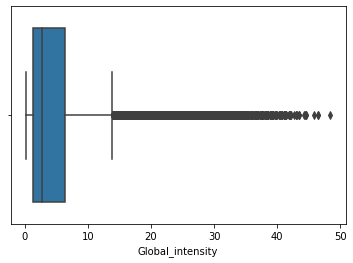

In [191]:
sns.boxplot(data = df_train, x = 'Global_intensity')

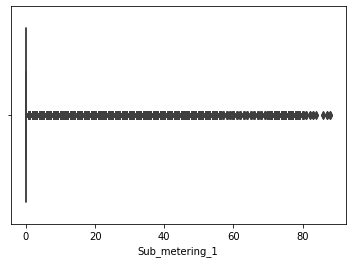

In [192]:
sns.boxplot(data = df_train, x = 'Sub_metering_1')

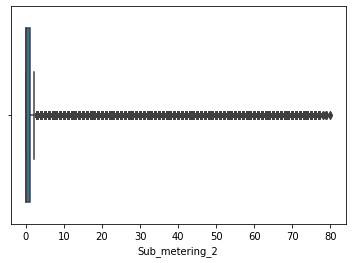

In [193]:
sns.boxplot(data = df_train, x = 'Sub_metering_2')

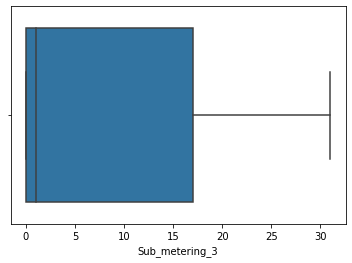

In [194]:
sns.boxplot(data = df_train, x = 'Sub_metering_3')

In [305]:
df_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


# Train Test Split

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
X = df_train.drop('Global_intensity',1)
y = df_train.Global_intensity

In [308]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Scaling

In [309]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [310]:
var = X_train.columns.to_list()
var

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [311]:
X_train[var] = scaler.fit_transform(X_train[var])
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2007-05-12 02:38:00,-0.892876,-1.091939,-1.877031,-0.184683,-0.223633,-0.770824
2008-02-20 16:43:00,1.372168,0.030398,0.289253,-0.184683,5.984774,-0.770824
2008-04-26 16:53:00,-0.477835,-1.091939,0.216233,-0.184683,-0.223633,-0.652710
2008-05-20 22:02:00,0.622117,0.760807,-0.994696,-0.184683,-0.223633,0.528429
2009-07-08 14:57:00,-0.732815,0.475769,0.642187,-0.184683,-0.055839,-0.770824


In [340]:
X_train = X_train.reset_index()
X_train.drop('DateTime',1,inplace = True)

In [341]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1.0,-0.892876,-1.091939,-1.877031,-0.184683,-0.223633,-0.770824
1,1.0,1.372168,0.030398,0.289253,-0.184683,5.984774,-0.770824
2,1.0,-0.477835,-1.091939,0.216233,-0.184683,-0.223633,-0.652710
3,1.0,0.622117,0.760807,-0.994696,-0.184683,-0.223633,0.528429
4,1.0,-0.732815,0.475769,0.642187,-0.184683,-0.055839,-0.770824


In [344]:
lr = sm.OLS(y_train.values,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.502e+08
Date:                Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                        14:23:08   Log-Likelihood:             4.4952e+05
No. Observations:             1288451   AIC:                        -8.990e+05
Df Residuals:                 1288444   BIC:                        -8.989e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.7017      0.000   3.13e+04      0.000       4.701       4.702
Global_active_power       4.4909      0.000   1.53e+04      0.000       4.490       4.491
Global_reactive_power     0.0839      0.000    537.442      0.000       0.084       0.084
Voltage                  -0.0643      0.000   -392.048      0.000      -0.065      -0.064
Sub_metering_1            0.0160      0.000     84.137      0.000       0.016       0.016
Sub_metering_2            0.0199      0.000    108.562      0.000       0.020       0.020
Sub_metering_3           -0.0647      0.000   -293.664      0.000      -0.065      -0.064
==============================================================================
Omnibus:                   948853.860   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35663210.958
Skew:                           3.153   Prob(JB):                         0.00
Kurtosis:                      27.991   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [345]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, x) for x in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF')
vif

,features,VIF
1,Global_reactive_power,1.08
2,Voltage,1.19
4,Sub_metering_2,1.49
3,Sub_metering_1,1.59
5,Sub_metering_3,2.15
0,Global_active_power,3.81


## Test accuracy

In [348]:
from sklearn import metrics

In [350]:
train_pred = lr.predict(X_train_sm)

In [352]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred))

0.17070478149138366

In [353]:
metrics.r2_score(y_train,train_pred)

0.9985722120599462

# Transforming test set

In [346]:
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-07-02 07:58:00,0.376,0.208,237.01,1.8,0.0,0.0,1.0
2010-07-02 07:59:00,0.380,0.218,239.24,1.8,0.0,0.0,0.0
2010-07-02 08:00:00,0.378,0.216,238.64,1.8,0.0,0.0,1.0
2010-07-02 08:01:00,0.378,0.218,239.13,1.8,0.0,0.0,1.0
2010-07-02 08:02:00,0.376,0.214,238.32,1.8,0.0,0.0,0.0


In [356]:
X_test = df_valid.drop('Global_intensity',1)
y_test = df_valid.Global_intensity

# Transform test data

In [358]:
X_test[var] = scaler.transform(X_test[var])
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2010-07-02 07:58:00,-0.682564,0.760807,-1.152908,-0.184683,-0.223633,-0.652710
2010-07-02 07:59:00,-0.678842,0.849882,-0.474422,-0.184683,-0.223633,-0.770824
2010-07-02 08:00:00,-0.680703,0.832067,-0.656975,-0.184683,-0.223633,-0.652710
2010-07-02 08:01:00,-0.680703,0.849882,-0.507890,-0.184683,-0.223633,-0.652710
2010-07-02 08:02:00,-0.682564,0.814252,-0.754336,-0.184683,-0.223633,-0.770824


In [360]:
X_test = X_test.reset_index().drop('DateTime',1)
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,-0.682564,0.760807,-1.152908,-0.184683,-0.223633,-0.652710
1,-0.678842,0.849882,-0.474422,-0.184683,-0.223633,-0.770824
2,-0.680703,0.832067,-0.656975,-0.184683,-0.223633,-0.652710
3,-0.680703,0.849882,-0.507890,-0.184683,-0.223633,-0.652710
4,-0.682564,0.814252,-0.754336,-0.184683,-0.223633,-0.770824


In [361]:
import statsmodels.api as sm
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1.0,-0.682564,0.760807,-1.152908,-0.184683,-0.223633,-0.652710
1,1.0,-0.678842,0.849882,-0.474422,-0.184683,-0.223633,-0.770824
2,1.0,-0.680703,0.832067,-0.656975,-0.184683,-0.223633,-0.652710
3,1.0,-0.680703,0.849882,-0.507890,-0.184683,-0.223633,-0.652710
4,1.0,-0.682564,0.814252,-0.754336,-0.184683,-0.223633,-0.770824


In [363]:
y_test

DateTime
2010-07-02 07:58:00    1.8
2010-07-02 07:59:00    1.8
2010-07-02 08:00:00    1.8
2010-07-02 08:01:00    1.8
2010-07-02 08:02:00    1.8
                      ... 
2010-11-26 20:58:00    4.0
2010-11-26 20:59:00    4.0
2010-11-26 21:00:00    3.8
2010-11-26 21:01:00    3.8
2010-11-26 21:02:00    3.8
Name: Global_intensity, Length: 199522, dtype: float64

In [364]:
y_test = y_test.reset_index().drop('DateTime',1)
y_test.head()

,Global_intensity
0,1.8
1,1.8
2,1.8
3,1.8
4,1.8


In [366]:
test_pred = lr.predict(X_test_sm)
test_pred

0         1.809152
1         1.797390
2         1.791621
3         1.783536
4         1.795672
            ...   
199517    3.976524
199518    3.976574
199519    3.955019
199520    3.940648
199521    3.935223
Length: 199522, dtype: float64

In [367]:
np.sqrt(metrics.mean_squared_error(y_test,test_pred))

0.1661272868524556

In [368]:
metrics.r2_score(y_test,test_pred)

0.9979093077606878